In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import re

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


In [2]:
df_wontfix=pd.read_csv("C:/Users/jaish/code/classification_wont-fix_issues_github/Dataset/wontfix-issues.csv")
df_non_wontfix=pd.read_csv("C:/Users/jaish/code/classification_wont-fix_issues_github/Dataset/non-wontfix-issues.csv")

In [3]:
df_wontfix_temp = df_wontfix.drop(columns=['nCommentsT','nActorsT','issue_labels_additional_to_wontfix','date_first_comment','issue_closing_date','date_last_comment','timeToCloseIssue','timeToDiscussIssue','AllCommentsIssue','meanCommentSize'])

In [4]:
df_wontfix_temp['issue_labels'] = 'wontfix'

In [5]:
df_non_wontfix_temp = df_non_wontfix.copy()

In [6]:
df_non_wontfix_temp['issue_labels'] = 'non wontfix'

In [7]:
merged_temp = [df_wontfix_temp, df_non_wontfix_temp]
df_final = pd.concat(merged_temp)
df_final.head(10)

,project_name,project_url,project_language,issue_url,issue_labels,TitleIssue,DescriptionIssue
0,fabiospampinato/vscode-todo-plus,https://github.com/fabiospampinato/vscode-todo...,C#,https://github.com/fabiospampinato/vscode-todo...,wontfix,"improve ""Enter"" key <U+00B7> ""","When I press the ""enter"" key and th..."
1,fabiospampinato/vscode-todo-plus,https://github.com/fabiospampinato/vscode-todo...,C#,https://github.com/fabiospampinato/vscode-todo...,wontfix,Syntax renders whitespace character as part of...,When using the setting <code>edito...
2,fabiospampinato/vscode-todo-plus,https://github.com/fabiospampinato/vscode-todo...,C#,https://github.com/fabiospampinato/vscode-todo...,wontfix,Archive only if sub-tasks are completed <U+00B...,"When I press archive, I only want t..."
3,fabiospampinato/vscode-todo-plus,https://github.com/fabiospampinato/vscode-todo...,C#,https://github.com/fabiospampinato/vscode-todo...,wontfix,[Feature Request] auto save when change todo s...,I thinks it's fair feature that whe...
4,fabiospampinato/vscode-todo-plus,https://github.com/fabiospampinato/vscode-todo...,C#,https://github.com/fabiospampinato/vscode-todo...,wontfix,Maintain the project structure (indentation) a...,<strong>AS IS</strong>: Given a to...
5,zzzprojects/GraphDiff,https://github.com/zzzprojects/GraphDiff,C#,https://github.com/zzzprojects/GraphDiff/issue...,wontfix,Null values in entity should not be passed to ...,In a distributed scenario we often ...
6,yysun/Git-Source-Control-Provider,https://github.com/yysun/Git-Source-Control-Pr...,C#,https://github.com/yysun/Git-Source-Control-Pr...,wontfix,Support Visual Studio 2008 Database Project <...,"""Database Projects"" in Visual Studi..."
7,ilich/MvcReportViewer,https://github.com/ilich/MvcReportViewer,C#,https://github.com/ilich/MvcReportViewer/issue...,wontfix,Can I use this with ASP.net core2.0 projects <...,Got a error saying that it was rest...
8,ilich/MvcReportViewer,https://github.com/ilich/MvcReportViewer,C#,https://github.com/ilich/MvcReportViewer/issue...,wontfix,"MvcReportViewer Browser issue <U+00B7> """,About MvcReportViewer supported Man...
9,ilich/MvcReportViewer,https://github.com/ilich/MvcReportViewer,C#,https://github.com/ilich/MvcReportViewer/issue...,wontfix,"Scroll Bar issues in ie 11, works good in othe...",Scroll bar appears perfectly well i...


In [8]:
def issue_number(i):
  if i['issue_labels'] == 'non wontfix':
    return 1
  else :
    return 0
df_final['issue_number'] = df_final.apply(lambda i:issue_number(i), axis=1)

In [9]:
df_final.TitleIssue.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4481    False
4482    False
4483     True
4484    False
4485     True
Name: TitleIssue, Length: 6330, dtype: bool

In [10]:
# Dropping duplicate Issue Titles
df_final.drop_duplicates(subset = ['TitleIssue'], inplace = True)

In [11]:
COUNT = df_final['issue_labels'].value_counts().sort_index()
print(COUNT)

non wontfix    3966
wontfix        1844
Name: issue_labels, dtype: int64


In [12]:
import matplotlib.pyplot as plotAxis

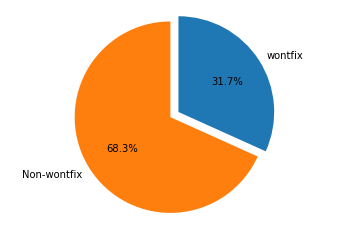

In [13]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
ACTIVITY_DICT = {0:'wontfix', 1:'Non-wontfix'}
ACTIVITY_KEYS = list(ACTIVITY_DICT.keys())
activities = list(ACTIVITY_DICT.values())
area = [COUNT[1], COUNT[0]]
explode = (0.1, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

Figure1, Axes1 = plotAxis.subplots()
Axes1.pie(area, labels=activities, explode = explode, autopct='%1.1f%%', startangle = 90, counterclock=False, shadow=False)
Axes1.axis('equal')
plotAxis.show()

ADD NEW FEATURE

In [14]:
import nltk
from nltk.corpus import stopwords

In [15]:
import re
def remove_HTML(string):
  tags = re.sub('<.*?>','',str(string))
  return tags

df_final['TitleIssue'] = df_final['TitleIssue'].apply(lambda x : remove_HTML(x))
df_final['DescriptionIssue'] = df_final['DescriptionIssue'].apply(lambda x : remove_HTML(x))

In [16]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [17]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\jaish\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [18]:
analyser = SentimentIntensityAnalyzer()

In [19]:
from tqdm import tqdm

In [20]:
# Finding the positive, negative, neutral sentiments for the Description Issue 
neg = []
pos = []
neu = []
compound = []

for a in tqdm(df_final["DescriptionIssue"]) :
    b = analyser.polarity_scores(a)['neg']
    c = analyser.polarity_scores(a)['pos']
    d = analyser.polarity_scores(a)['neu']
    e = analyser.polarity_scores(a)['compound']
    neg.append(b)
    pos.append(c)
    neu.append(d)
    compound.append(e)

100%|██████████| 5810/5810 [00:17<00:00, 334.34it/s]


In [21]:
df_final["positive"] = pos
df_final["negative"] = neg
df_final["neutral"] = neu
df_final["compound"] = compound

In [22]:
df_final


,project_name,project_url,project_language,issue_url,issue_labels,TitleIssue,DescriptionIssue,issue_number,positive,negative,neutral,compound
0,fabiospampinato/vscode-todo-plus,https://github.com/fabiospampinato/vscode-todo...,C#,https://github.com/fabiospampinato/vscode-todo...,wontfix,"improve ""Enter"" key ""","When I press the ""enter"" key and th...",0,0.088,0.000,0.912,0.4404
1,fabiospampinato/vscode-todo-plus,https://github.com/fabiospampinato/vscode-todo...,C#,https://github.com/fabiospampinato/vscode-todo...,wontfix,Syntax renders whitespace character as part of...,When using the setting editor.rend...,0,0.174,0.000,0.826,0.4215
2,fabiospampinato/vscode-todo-plus,https://github.com/fabiospampinato/vscode-todo...,C#,https://github.com/fabiospampinato/vscode-todo...,wontfix,"Archive only if sub-tasks are completed ""","When I press archive, I only want t...",0,0.058,0.041,0.901,-0.0258
3,fabiospampinato/vscode-todo-plus,https://github.com/fabiospampinato/vscode-todo...,C#,https://github.com/fabiospampinato/vscode-todo...,wontfix,[Feature Request] auto save when change todo s...,I thinks it's fair feature that whe...,0,0.398,0.000,0.602,0.8360
4,fabiospampinato/vscode-todo-plus,https://github.com/fabiospampinato/vscode-todo...,C#,https://github.com/fabiospampinato/vscode-todo...,wontfix,Maintain the project structure (indentation) a...,AS IS: Given a todo structure wher...,0,0.055,0.018,0.927,0.7080
...,...,...,...,...,...,...,...,...,...,...,...,...
4479,nunit/nunit-vs-adapter,https://github.com/nunit/nunit-vs-adapter,C#,https://github.com/nunit/nunit-vs-adapter/issu...,non wontfix,"Support Visual Studio vNext 15.0 · """,No description provided.,1,0.000,0.524,0.476,-0.2960
4480,nunit/nunit-vs-adapter,https://github.com/nunit/nunit-vs-adapter,C#,https://github.com/nunit/nunit-vs-adapter/issu...,non wontfix,Adapter should not try to discover tests if th...,"The adapter uses NUnit 2.6.3,...",1,0.000,0.000,1.000,0.0000
4481,nunit/nunit-vs-adapter,https://github.com/nunit/nunit-vs-adapter,C#,https://github.com/nunit/nunit-vs-adapter/issu...,non wontfix,"Feature request : enable diagnostic logging · """,Some of the tests have been hanging on the bu...,1,0.059,0.019,0.922,0.6908
4482,nunit/nunit-vs-adapter,https://github.com/nunit/nunit-vs-adapter,C#,https://github.com/nunit/nunit-vs-adapter/issu...,non wontfix,"Test Adapter does not find addins · """,https://groups.google.com/forum/#!topic/nunit...,1,0.059,0.026,0.915,0.4035


In [23]:
df_final_shuffled = df_final.sample(frac = 1)

In [24]:
df_final_shuffled.dropna(axis = 0, inplace = True)


In [25]:
temp_drop = df_final_shuffled[['issue_labels', 'issue_number']].drop_duplicates()
final_class = dict(temp_drop[['issue_number', 'issue_labels']].values)
final_class



{0: 'wontfix', 1: 'non wontfix'}

PREPROCESSING

In [26]:
from nltk.tokenize import word_tokenize

In [27]:
def tokenize_text(text_string):
    return word_tokenize(text_string)

df_final_shuffled['TitleIssue'] = df_final_shuffled['TitleIssue'].apply(lambda x : tokenize_text(x))
df_final_shuffled['DescriptionIssue'] = df_final_shuffled['DescriptionIssue'].apply(lambda x : tokenize_text(x))

In [28]:
#importing the Stemming function from nltk library
from nltk.stem.porter import PorterStemmer

#defining the object for stemming
porter_stemmer = PorterStemmer()

In [29]:
#defining a function for stemming
def stemming(text):
    stem_text = [porter_stemmer.stem(word) for word in text]
    return stem_text

In [30]:
#applying the function
df_final_shuffled['TitleIssue'] = df_final_shuffled['TitleIssue'].apply(lambda x : stemming(x))
df_final_shuffled['DescriptionIssue'] = df_final_shuffled['DescriptionIssue'].apply(lambda x : stemming(x))

In [31]:
#importing nlp library
import nltk

stopwords = nltk.corpus.stopwords.words('english')
stopwords[0:10]
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [32]:
#defining the function to remove stopwords from tokenized text
def remove_stopwords(text):
    output= [i for i in text if i not in stopwords]
    return output

In [33]:
#applying the function
df_final_shuffled['TitleIssue'] = df_final_shuffled['TitleIssue'].apply(lambda x : remove_stopwords(x))
df_final_shuffled['DescriptionIssue'] = df_final_shuffled['DescriptionIssue'].apply(lambda x : remove_stopwords(x))

In [34]:
def convert_to_lowercase(text_string):
    return str(text_string).lower()

In [35]:
#applying the function
df_final_shuffled['TitleIssue'] = df_final_shuffled['TitleIssue'].apply(convert_to_lowercase)
df_final_shuffled['DescriptionIssue'] = df_final_shuffled['DescriptionIssue'].apply(convert_to_lowercase)

CLASSIFICATION

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
issuetitle_tf= TfidfVectorizer(min_df=5, stop_words='english')

In [38]:
issuedes_tf= TfidfVectorizer(min_df=5, stop_words='english')

In [39]:
tokenized_text_features31 = list(issuetitle_tf.fit_transform(df_final_shuffled['TitleIssue']).toarray())

In [40]:
tokenized_text_features32 = list(issuedes_tf.fit_transform(df_final_shuffled['DescriptionIssue']).toarray())

In [41]:
# Get top 50 terms with highest tf-idf score (Issue Title)


tfidf_title = issuetitle_tf.fit_transform(df_final_shuffled['TitleIssue'])
importance = np.argsort(np.asarray(tfidf_title.sum(axis=0)).ravel())[::-1]
tfidf_feature_names = np.array(issuetitle_tf.get_feature_names())
print(tfidf_feature_names[importance[:50]])


['support' 'add' '39' 'use' 'error' 'work' 'test' 'issu' 'updat' 'remov'
 'net' 'gener' 'chang' 'file' 'method' 'doe' 'request' 'option' 'make'
 'code' 'new' 'fail' 'set' 'version' 'crash' 'type' 'allow' 'creat'
 'build' 'instal' 'page' 'project' 'featur' 'configur' 'document'
 'implement' 'packag' 'fix' 'run' 'window' 'valid' 'default' 'properti'
 'log' 'valu' 'paramet' 'load' 'list' 'api' 'core']


C:\Users\jaish\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [42]:
# Get top 50 terms with highest tf-idf score (Issue Description)


tfidf_des = issuedes_tf.fit_transform(df_final_shuffled['DescriptionIssue'])
importance = np.argsort(np.asarray(tfidf_des.sum(axis=0)).ravel())[::-1]
tfidf_feature_names = np.array(issuedes_tf.get_feature_names())
print(tfidf_feature_names[importance[:50]])

['descript' 'provid' 'thi' 'use' 'gt' 'lt' 'http' 'com' 'test' 'version'
 'new' 'issu' 'code' 'work' 'file' 'need' 'like' 'add' 'set' 'chang' 'net'
 'error' 'doe' 'ani' 'public' 'type' 'method' 'microsoft' 'current'
 'string' 'onli' 'valu' 'support' 'run' 'make' 'user' 'ha' 'project'
 'class' 'id' 'tri' 'wa' 'creat' 'object' 'option' 'thank' 'log' 'return'
 'build' 'updat']


In [44]:
y = df_final_shuffled['positive'].to_list()
z = df_final_shuffled['negative'].to_list()
n = df_final_shuffled['compound'].to_list()

In [45]:
 # for postive sentiment 

features_X = []
for i,j in enumerate(tokenized_text_features31):
  temp1 = np.append(tokenized_text_features31[i],tokenized_text_features32[i])
  temp2 = np.append(y[i],temp1)
  features_X.append(temp2)
features_X = np.array(features_X)

In [47]:
# for postive and negative feature

#features_X = []
#for i,j in enumerate(tokenized_text_features31):
  #temp1 = np.append(tokenized_text_features31[i],tokenized_text_features32[i])
  #temp2 = np.append(y[i],temp1)
  #temp3 = np.append(z[i],temp2)
  #features_X.append(temp3)
#features_X = np.array(features_X)

In [48]:
# for only negative sentiment 

#features_X = []
#for i,j in enumerate(tokenized_text_features31):
  #temp1 = np.append(tokenized_text_features31[i],tokenized_text_features32[i])
  #temp2 = np.append(z[i],temp1)
  #features_X.append(temp2)
#features_X = np.array(features_X)

In [49]:
from sklearn.model_selection import train_test_split
X_train_31, X_test_31, Y_train_31, Y_test_31 = train_test_split(features_X, df_final_shuffled['issue_number'].values, test_size=0.5, random_state = 400)

In [50]:
mn = MultinomialNB()
y_pred_31 = mn.fit(X_train_31, Y_train_31).predict(X_test_31)
print("Naive Bayes - ", accuracy_score(Y_test_31, y_pred_31))

Naive Bayes -  0.774526678141136


In [51]:
print('accuracy %.2f' % (accuracy_score(y_pred_31, Y_test_31)*100) + '%')
print(classification_report(Y_test_31, y_pred_31))
mn = confusion_matrix(Y_test_31, y_pred_31)
print(confusion_matrix(Y_test_31, y_pred_31))
#sn.heatmap(mn, annot=True)

accuracy 77.45%
              precision    recall  f1-score   support

           0       0.80      0.39      0.53       929
           1       0.77      0.95      0.85      1976

    accuracy                           0.77      2905
   macro avg       0.79      0.67      0.69      2905
weighted avg       0.78      0.77      0.75      2905

[[ 365  564]
 [  91 1885]]


In [52]:
lr = LogisticRegression()
y_pred_32 = lr.fit(X_train_31, Y_train_31).predict(X_test_31)
print("Logistic Regression - ", accuracy_score(Y_test_31, y_pred_32))

Logistic Regression -  0.7693631669535284


In [53]:
print('accuracy %.2f' % (accuracy_score(y_pred_32, Y_test_31)*100) + '%')
print(classification_report(Y_test_31, y_pred_32))
lr = confusion_matrix(Y_test_31, y_pred_32)
print(confusion_matrix(Y_test_31, y_pred_32))

accuracy 76.94%
              precision    recall  f1-score   support

           0       0.78      0.39      0.52       929
           1       0.77      0.95      0.85      1976

    accuracy                           0.77      2905
   macro avg       0.77      0.67      0.68      2905
weighted avg       0.77      0.77      0.74      2905

[[ 364  565]
 [ 105 1871]]


In [54]:
from sklearn.tree import DecisionTreeClassifier

In [55]:
j48 = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state = 400)
y_pred_33 = j48.fit(X_train_31, Y_train_31).predict(X_test_31)
print("J48 - ", accuracy_score(Y_test_31, y_pred_33))

J48 -  0.7118760757314975


In [56]:
print('accuracy %.2f' % (accuracy_score(y_pred_33, Y_test_31)*100) + '%')
print(classification_report(Y_test_31, y_pred_33))
j48 = confusion_matrix(Y_test_31, y_pred_33)
print(confusion_matrix(Y_test_31, y_pred_33))


accuracy 71.19%
              precision    recall  f1-score   support

           0       0.96      0.10      0.19       929
           1       0.70      1.00      0.82      1976

    accuracy                           0.71      2905
   macro avg       0.83      0.55      0.51      2905
weighted avg       0.79      0.71      0.62      2905

[[  96  833]
 [   4 1972]]


In [57]:
rf = RandomForestClassifier()
y_pred_34 = rf.fit(X_train_31, Y_train_31).predict(X_test_31)
print("Random Forest - ", accuracy_score(Y_test_31, y_pred_34))

Random Forest -  0.7562822719449226


In [58]:
print('accuracy %.2f' % (accuracy_score(y_pred_34, Y_test_31)*100) + '%')
print(classification_report(Y_test_31, y_pred_34))
rf = confusion_matrix(Y_test_31, y_pred_34)
print(confusion_matrix(Y_test_31, y_pred_34))


accuracy 75.63%
              precision    recall  f1-score   support

           0       0.77      0.34      0.47       929
           1       0.75      0.95      0.84      1976

    accuracy                           0.76      2905
   macro avg       0.76      0.65      0.66      2905
weighted avg       0.76      0.76      0.72      2905

[[ 315  614]
 [  94 1882]]


10 fold cross validation

In [59]:

from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# 10 Fold Cross Validation for Naive Bayes Algorithm

# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
model = MultinomialNB()
# evaluate model
scores = cross_val_score(model, features_X, df_final_shuffled['issue_number'].values, scoring='accuracy', cv=cv, n_jobs=-1)
print(scores)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

[0.767642   0.77624785 0.77969019 0.76247849 0.77108434 0.77796902
 0.79690189 0.78141136 0.79173838 0.81067126]
Accuracy: 0.782 (0.014)


In [60]:
# 10 Fold Cross Validation for Logistic Regression

# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
model2 = LogisticRegression()
# evaluate model
scores = cross_val_score(model2, features_X, df_final_shuffled['issue_number'].values, scoring='accuracy', cv=cv, n_jobs=-1)
print(scores)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

[0.76075731 0.75903614 0.76419966 0.77452668 0.76419966 0.75903614
 0.79690189 0.75731497 0.77108434 0.78657487]
Accuracy: 0.769 (0.013)


In [61]:
# 10 Fold Cross Validation for J48

# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
model3 = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state = 400)
# evaluate model
scores = cross_val_score(model3, features_X, df_final_shuffled['issue_number'].values, scoring='accuracy', cv=cv, n_jobs=-1)
print(scores)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

[0.69535284 0.7091222  0.69535284 0.72289157 0.68158348 0.70395869
 0.74010327 0.70567986 0.70567986 0.74010327]
Accuracy: 0.710 (0.018)


In [62]:
# 10 Fold Cross Validation for Random Forest Classifier

# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
model4 = RandomForestClassifier()
# evaluate model
scores = cross_val_score(model4, features_X, df_final_shuffled['issue_number'].values, scoring='accuracy', cv=cv, n_jobs=-1)
print(scores)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

[0.7383821  0.74526678 0.75387263 0.74870912 0.74182444 0.73666093
 0.78829604 0.75903614 0.74698795 0.77624785]
Accuracy: 0.754 (0.016)
